Bayesian posterior inference: Explain Bayes’ Rule. Write some code to actually perform posterior sampling. Work out an example using conjugate priors. How does this compare with hypothesis testing? What are the underlying assumptions?

### In many real world applications, we don't know the probability of events, but we would like to estimate this unknown probability based on our hypothesis and collected evidence. Seems rational, right? 

#### This is the basis for Bayes' Rule, where we:
1. Identify possible models and construct prior probabilities (based on our knowledge or beliefs)
2. Collect data and create liklihoods, or the chance of getting this data given each model 
3. Use Bayes' rule to find posterior probabilities and update our knowledge so we can determine which model is likely to be correct


The basic conditional probability equation is:

$P(A|B) = \frac{P(A\cap B)}{P(B)}$

The probability of A ${given}$ B is equal to the probability of both A and B occuring, normalized by the probability of B occuring. This is often written as:

$P(A|B) = \frac{P(B|A) P(A)}{P(B)}$

Here we would say the Posterior probability P(A|B) is equal to the Likelihood P(B|A) multiplied by the Prior P(A) normalized by the probability of data P(B).

#### Let's work through an example and describe some of the particulars as we go.
Say you're the city manager of Austin planning a free concert. Woah big city! And a heck of a music scene! This seems like a big task, and you want to know about how many people will come so you can plan ahead and order the right amount of food. You don't need an exact headcount because ordering is done in bulk. So you would like to know the approximate proportion of the city that will show up in 10% groups (10%, 20%, 30%, etc). Because you've been the city manager for a few years, you have some prior knowledge of these concerts and believe at least 20% of the town will show up, but not more than 90%. You also believe the 60% and 70% groups are 2X as likely as the others. What is the estimated proportion of the city that will show up? 

You're pretty savvy, and send out an email asking if people will attend the concert. You send it out to 150 people and 70 respond 'yes' and 80 respond 'no'. You know this proportion of attendance (70/150 = 0.46) is not the real estimate because surveys are not always accurate and people do change their minds. So, you want to employ some statistics to help you estimate the most likely proportion of people that will come.

Let's define this problem in Bayes terms.

#### 1. Identify possible models and construct prior probabilities

The models are the proportion of the town that will show up. We want to estimate the probability that each 'model' is true so we can determine the most likely scenario. The models are: p=0.3, p=0.4, p=0.5, p=0.6, p=0.6, p=0.8 and p=0.9
Prior probabilities are based on what we know about concert attendance. In this case, we have 7 models (p=0.3 ... p=0.9), if the probability of each model being true were equal the 'prior probabilities' would = 1/7. However, we know that p=0.6 is 2X as likely. The sum of prior probabilities must sum to 1. Therefore the model and priors are:


In [44]:
options(repos = c('https://cloud.r-project.org/'))
options(digits=3)
#install.packages("dplyr", "C:/Users/nrb75/AppData/Local/Continuum/anaconda3/Lib/R")
install.packages(c("ggplot2", "sciplot", "reshape", "dplyr","TeachBayes"))

Installing packages into 'C:/Users/nrb75/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'ggplot2' successfully unpacked and MD5 sums checked
package 'sciplot' successfully unpacked and MD5 sums checked
package 'reshape' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked
package 'TeachBayes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\nrb75\AppData\Local\Temp\RtmpWGroNL\downloaded_packages


In [45]:
#library(TeachBayes)

In [46]:
Models=c(0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9)
Priors=round(c(1/8, 1/8, 1/8, 2/8, 1/8, 1/8, 1/8),2)

df=data.frame(Models, Priors)
rownames(df)=c("p=0.3", "p=0.4", "p=0.5", "p=0.6", "p=0.7", "p=0.8", "p=0.9")
df

,Models,Priors
p=0.3,0.3,0.12
p=0.4,0.4,0.12
p=0.5,0.5,0.12
p=0.6,0.6,0.25
p=0.7,0.7,0.12
p=0.8,0.8,0.12
p=0.9,0.9,0.12


#### 2. Collect Data and create liklihoods

A liklihood is the probability of observing your result ${given}$ the model is true. In this scenario, the observed result is that from the survey. This is a binomial function where Success is defined as 'yes' I will attend the concert. Success=70, size = 150, and binomial probability of succes = models. Now we simply calculate the liklihood of observing the survey results, ${given}$ the model is true.

For example, the liklihood that p=0.3:

In [47]:
dbinom(70, size=150, prob=0.3)

[1] 6.76e-06

This is a very low value! and it suggests the liklihood of observing this survey result, ${given}$ the actual probability of attendance is 0.3 is very low.

Calculating the liklihood for the remaining models given the survey data is true:

In [48]:
df$Liklihood=dbinom(70, size=150, prob=Models)
df


,Models,Priors,Liklihood
p=0.3,0.3,0.12,6.76e-06
p=0.4,0.4,0.12,1.66e-02
p=0.5,0.5,0.12,4.67e-02
p=0.6,0.6,0.25,2.88e-04
p=0.7,0.7,0.12,1.41e-09
p=0.8,0.8,0.12,1.33e-19
p=0.9,0.9,0.12,4.18e-40


#### 3. Now we want to update our prior probabilities with a posterior probability, which depends on our priors and the observed data.

$Posterior\ probability =\frac{Prior\ x\ Liklihood} {\sum(Prior\ x\ Liklihood)}$


In [49]:
df$Product = df$Priors*df$Liklihood
df$Posterior=df$Product/sum(df$Product)
df

,Models,Priors,Liklihood,Product,Posterior
p=0.3,0.3,0.12,6.76e-06,8.11e-07,1.06e-04
p=0.4,0.4,0.12,1.66e-02,1.99e-03,2.60e-01
p=0.5,0.5,0.12,4.67e-02,5.60e-03,7.31e-01
p=0.6,0.6,0.25,2.88e-04,7.20e-05,9.38e-03
p=0.7,0.7,0.12,1.41e-09,1.70e-10,2.21e-08
p=0.8,0.8,0.12,1.33e-19,1.59e-20,2.07e-18
p=0.9,0.9,0.12,4.18e-40,5.01e-41,6.53e-39


A good check is that the sum of the Posterior probabilities = 1.

In [50]:
sum(df$Posterior)

[1] 1

Good, the Posterior probabilities sum to 1. Now how are these Posterior Probabilities different than our Priors?

In [51]:
options(repr.plot.width=4.5, repr.plot.height=4.5)
#library(reshape)
#library(ggplot2)

df.long=melt(df, id="Models")

plt.std=plt.std=theme(legend.position="top", legend.text = element_text(size=12), axis.text.x = element_text(size=12),  axis.text.y = element_text(size=12), axis.title.y = element_text(size=14), strip.text.x = element_text(size=16), panel.background = element_rect(fill='white', colour='black'), legend.key = element_blank())
color1=c("royalblue2", "red2")
ggplot(data=subset(df.long, variable%in% c("Priors", "Posterior")), aes(x=as.factor(Models), y=value, fill=variable))+geom_bar(stat="identity", position="dodge")+ylab("Probability")+scale_fill_manual(values=color1, name="")+xlab("Models")+ggtitle("Probabilities after 1st Survey")+plt.std

ERROR: Error in melt(df, id = "Models"): could not find function "melt"


Origninally, the prior probabilities are more equally distributed across our models. But, with our beliefs and the survey data we see that it is far more likely the survey results came from a model where the proportion of town attandance is 0.5.

This updates our probabilities and we would suggest the town manager order enough food for roughly 50% of Austin. $\textbf{Now she is more confident that the attendance will be near 50%, when earlier she thought it was more likely that the attendance could be 60%.}$ She is now able to save money and not waste food. What a good reason to employ Bayes' Theorem!

We're happy with these results, but suppose we wanted to send another survey closer to the concert date to give us a better estimate of the attendance. We would simply take the "Posteriors" from the results above and use them as our "Priors" in the calculations. 

In [ ]:
df2=df[c("Models", "Posterior")]
colnames(df2)[2]="Priors2"
df2

We calculate the Liklihoods next based on the new survey results.
Our new survey was sent to 100 people and 65 responded 'yes'. We calculate a new Liklihood for each model:

In [ ]:
df2$Liklihood2=dbinom(65, size=100, prob=Models)
df2

Now we recalculate the product and Posterior proabilities:

In [ ]:
df2$Product2 = df2$Priors*df2$Liklihood2
df2$Posterior2=df2$Product2/sum(df2$Product2)
df2

In [ ]:
df.long2=melt(df2, id="Models")

ggplot(data=subset(df.long2, variable%in% c("Priors2", "Posterior2")), aes(x=as.factor(Models), y=value, fill=variable))+geom_bar(stat="identity", position="dodge")+plt.std+ylab("Probability")+scale_fill_manual(values=color1, name="")+xlab("Models")+ggtitle("Probabilities after 2nd Survey")

Now, after the 2nd survey we are still confident the proprotion of Austin attending the concert will be 50% (p=0.5), but there is also a roughly 42% chance that p=0.6. If we repeated this again and again and survey results came from a known distribution, we would converge on the true probabilities for each model.

We'd like to be a bit more confident before placing our food order. But, we don't have time for more surveys. We have some statistic nerds in the city planning group, and they suggest running $\textbf{simulations}$ to update our Posterior probabilities.


### Using the same general idea as above, we'll construct a continuous Posterior distribution based on the Prior distribution.

Our Likelihood function is a binomial distribution (success = attendance), and it turns out that when we select the Prior distribution to be a Beta distribution, the Posterior distribution is also a Beta distribution! These are called $conjugate distributions$. The Prior is called a conjugate prior for the Likelihood function.
Thus, when we know our Liklihood function, we can cleverly select (or look up the known conjugates), the Prior distribution so we can determine the Posterior distribution. This helps simplify our ability to calculate the Posterior. 

$Posterior = \frac{(Likelihood) * Prior}{Data}$ 

$P(A|B) = \frac{P(B|A) P(A)}{P(B)}$ 

Because the denominator is a normalizing term (makes the probabilities sum to 1), we know that Posterior is proportional to Likelihood and Prior.  Think of this like chemistry with conjugate acids and bases. If we know the acid, we also know the conjugate base. If we know the Prior distribution, we also know the conjugate Posterior distribution.

In this binomial example:

$Posterior \ Beta \propto {(Binomial\ Likelihood) * Beta\ Prior}$

We won't get into all the details of a Beta distribution, but think of it like a normal distribution and instead of being characterizied by the mean and standard deviation, it is paramaterized by two shape terms a and b.

In this example, we are trying to calculate the true proportion of people in Austin that will attend this concert. The stats nerds have looked at previous attendance records, they determine:

1. Prior attendance proportion median value = 0.60 
2. The attendance proportion follows a Beta distribution with $\alpha$=2.9 and $\beta$=2 (this is our Prior)

In [ ]:
#library(dplyr)
#library(TeachBayes)
#Prior_beta=c(2.9,2)
#beta_draw(PriorBeta)
curve(dbeta(x,2.9,2),col = "blue", xlab = "Proportion of Attendance", ylab = "Probability Density")

### We simulate data from the Posterior distribution (Beta).
With a Beta distribution, this is pretty easy! The Posterior shape parameters are the Prior shape parameters scaled with the observed data.

$\alpha_{Posterior} = \alpha + number\ of\ Successes$

$\beta_{Posterior} = \beta + number\ of\ Failures$

Our new Posterior distribution is a Beta distribution with shape parameters:

$\alpha=2.9+70 = 72.9$

$\beta=2.0+80 = 80$

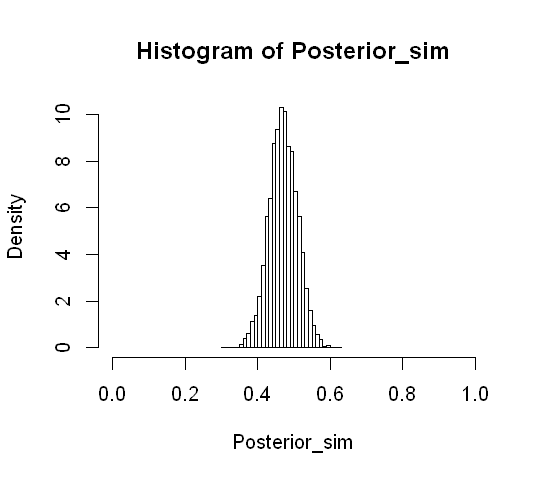

In [52]:
a=2.9+70 

b=2.0+80 
options(repr.plot.width=4.5, repr.plot.height=4)
Posterior_sim=rbeta(5000, a,b)
hist(Posterior_sim, breaks=30, freq=F, xlim=c(0,1))
#curve(dbeta(x,72.9,82),col = "red", xlab = "Proportion of Attendance", ylab = "Probability Density")

First, note how this Posterior is much narrower than the Prior. This means we are more confident in our estimates with the Posterior, because we used our knowledge and Bayes' rule.

Now we can make inferences with this Posterior distribution. 

Our boss (the Mayor!) wants us to order enough food so that there is a relatively small, 15%, chance we run out of food. We are looking for the 1-0.15 (85th) quantile, which is the point where we are 85% sure the proportion that will show up is smaller than this value.

In [53]:
round(quantile(Posterior_sim, .85),2)

85% 
0.51

Great! Now we only need to order enough food for 51% of Austin!

The Mayor also wants to know the probability that less than 40% of Austin will show up. If there will be low attendance, she may want to cancel the concert. Using our simulated data we calculate the probability of having attendance below 0.4:

$P(x<0.4) = \sum(x<0.4)/total\ observations$

In [54]:
sum(Posterior_sim<0.4)/length(Posterior_sim)

[1] 0.0386

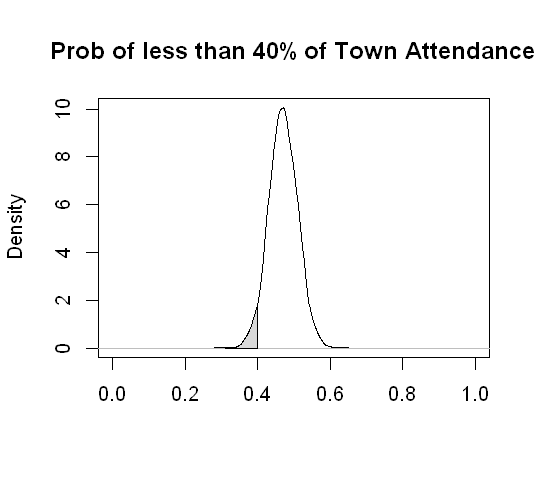

In [55]:
dens <- density(Posterior_sim) #desnity distribution of beta
criticalvaluelow=quantile(Posterior_sim, .0386) #critical value of lower tail
index=max(which(dens$x <=criticalvaluelow)) #critical value low
left=max(which(dens$x<.311)) #end. The area between indexhigh and right should be 0.025

plot(dens, xlim=c(0,1), xlab="", main="Prob of less than 40% of Town Attendance")
with(dens, polygon(x=c(x[c(left,left:index,index)]), y= c(0, y[left:index], 0), col="gray85")) #high tail

This gray area represents the probability that the attendance will be less than 0.4, and is only a 3.8% chance, and thus there is a 96.4% chance that more than 40% of the city will show up! This is good news! The Show will go on!

##### The Mayor is skeptical of these results. She wants a classical (Frequentist) analysis as well. In this case, we must use the original Beta distribution to estimate attendance.
This probability is calculated as:

In [56]:
round(pbeta(.4, 2.9,2),3)

[1] 0.192

The probability of having less than 40% of the town show up, according to classical methods, is almost 19%. This is much higher than our Bayes' approach.' But, it gives our boss peace of mind that we will likely have more than 40% of the city show up, even if we use the more conservative classical calculations.

In [ ]:
Posteior_beta=c(2.9+70, 2.0+80)

beta_prior_post(Prior_beta, Posterior_beta)